In [1085]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses-data-2023/instructors.csv
/kaggle/input/udemy-courses-data-2023/courses.csv


# IMPORTING DEPENDENCIES

In [1086]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET AS DATAFRAME

In [1087]:
df_c = pd.read_csv("/kaggle/input/udemy-courses-data-2023/courses.csv")

In [1088]:
df_c.head()

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22 total hours,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5 total hours,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64 total hours,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5 total hours,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64 total hours,31334738,https://img-c.udemycdn.com/course/750x422/2776...


In [1089]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83104 entries, 0 to 83103
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      83104 non-null  int64  
 1   title                   83104 non-null  object 
 2   url                     83104 non-null  object 
 3   rating                  83104 non-null  float64
 4   num_reviews             83104 non-null  int64  
 5   num_published_lectures  83104 non-null  int64  
 6   created                 83104 non-null  object 
 7   last_update_date        83026 non-null  object 
 8   duration                83104 non-null  object 
 9   instructors_id          83104 non-null  int64  
 10  image                   83104 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 7.0+ MB


### Since rating will be the dependent variable, only the numerical features will be considered.

In [1090]:
numerical_features = ['rating', 'num_reviews', 'num_published_lectures', 'duration']
df_cn = df_c[numerical_features]

In [1091]:
df_cn.describe()

,rating,num_reviews,num_published_lectures
count,83104.000000,83104.000000,83104.000000
mean,4.024024,432.482131,41.189028
std,1.165697,3959.906512,54.618540
min,0.000000,0.000000,0.000000
25%,3.954133,9.000000,13.000000
50%,4.359388,36.000000,25.000000
75%,4.623386,135.000000,48.000000
max,5.000000,452973.000000,891.000000


In [1092]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83104 entries, 0 to 83103
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  83104 non-null  float64
 1   num_reviews             83104 non-null  int64  
 2   num_published_lectures  83104 non-null  int64  
 3   duration                83104 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ MB


Duration feature is totally made up of string values, and are also variable in format. Another problem is the existence of "problems" in the duration, which might introduce ambiguity.

In [1093]:
df_cn[df_cn["duration"].str.contains("questions")]

,rating,num_reviews,num_published_lectures,duration
546,4.713131,3276,0,335 questions
557,4.619030,3190,0,279 questions
1249,4.497761,1218,0,159 questions
2141,4.541392,558,0,239 questions
2789,4.577136,364,0,180 questions
...,...,...,...,...
79384,4.658982,8,0,157 questions
79685,4.306122,4,0,144 questions
80378,0.000000,0,0,25 questions
82426,5.000000,2,0,155 questions


In [1094]:

print(df_cn[df_cn["duration"].str.contains("questions")].value_counts().sum())
print(df_cn[df_cn["duration"].str.contains("total hours")].value_counts().sum())
print(df_cn[df_cn["duration"].str.contains("total mins")].value_counts().sum())


2212
63399
6066


Having questions in place of an actual duration is, again, pretty ambiguous. Volume-wise it isn't that impactful. Ergo, rows containing questions as a "duration" will be dropped instead.

In [1095]:
df_cn = df_cn[~df_cn["duration"].str.contains("questions")]

In [1096]:
df_cn[df_cn["duration"].str.split(" ").str.len() <= 1]

,rating,num_reviews,num_published_lectures,duration
14254,3.596311,63,0,0
19595,4.461828,7,0,0
22561,3.809053,22,0,0
24155,5.000000,3,0,0
29392,0.000000,0,0,0
52128,0.000000,0,0,0
59278,5.000000,1,0,0
63547,5.000000,1,0,0
63583,0.000000,0,0,0
73041,0.000000,0,0,0


Duration values that isn't subscribed to any distinguishable unit of measurement will be dropped as well to avoid ambiguity.

In [1097]:
df_cn = df_cn[df_cn["duration"].str.split(" ").str.len() > 1]

In [1098]:
df_cn.dropna(subset=['duration'], inplace=True)

In [1099]:
duration_strings = df_cn['duration'].str.extract(r'(\D+)')
print(duration_strings[0].unique())

[' total hours' '.' ' total hour' ' total mins']


Aside from numerical values, there are also string values which will cause a problem in parsing the duration column into a numerical type.

### Minutes will be converted into hours instead to have a standard scale, and will be slicing any other values that cannot be converted to a numeric type.

In [1100]:
duration_mins = (df_cn[df_cn["duration"]\
      .str.contains("mins")]["duration"]\
      .str.split(" ").str[0].astype("float32") / 60).astype("str")

dm_vals = duration_mins.values
dm_ind = duration_mins.index

df_cn.loc[dm_ind, 'duration'] = dm_vals

### Same goes for the hourly durations

In [1101]:
duration_hours = df_cn[df_cn["duration"]\
      .str.contains("hour")]["duration"]\
      .str.split(" ").str[0]

dh_vals = duration_hours.values
dh_ind = duration_hours.index

df_cn.loc[dh_ind, 'duration'] = dh_vals

In [1102]:
df_cn[df_cn["duration"].str.split(" ").str.len() > 1].sum()

rating                    0.0
num_reviews               0.0
num_published_lectures    0.0
duration                  0.0
dtype: float64

### After having dealt with the duration, there are no more ambiguities left to work with.

In [1103]:
df_cn['duration'] = df_cn['duration'].astype("float64")
df_cn.rename(columns = {'duration':'duration_hr'}, inplace = True)


In [1105]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80881 entries, 0 to 83103
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  80881 non-null  float64
 1   num_reviews             80881 non-null  int64  
 2   num_published_lectures  80881 non-null  int64  
 3   duration_hr             80881 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.1 MB


# Feature Engineering

In [1106]:
df_cn["num_reviews_per_published_lecture"] = df_cn["num_reviews"] / df_cn["num_published_lectures"]
df_cn["num_reviews_per_hour"] = df_cn["num_reviews"] / df_cn["duration_hr"]

In [1107]:
X = df_cn.drop("rating", axis = 1)
y = df_cn["rating"]

In [1108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_col_names = list(X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=X_col_names)

X_scaled.head()

,num_reviews,num_published_lectures,duration_hr,num_reviews_per_published_lecture,num_reviews_per_hour
0,112.888603,2.051343,2.215167,56.476997,29.890329
1,65.536046,8.150084,7.851492,10.232128,5.709241
2,63.430363,10.443939,7.657136,7.836812,5.654190
3,44.857142,7.822391,3.834801,7.224351,7.470798
4,44.186347,11.536251,7.657136,4.912925,3.895396


In [1109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.60, random_state = 26)

In [1110]:
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# model = RandomForestRegressor(n_estimators=100, random_state=42)
model = XGBRegressor(n_estimators=100, random_state=26)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
# grid_search.fit(X_train, y_train)


model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=26,
             reg_alpha=0, reg_lambda=1, ...)

In [1111]:
y_pred = model.predict(X_test)

In [1112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error", rmse)
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)


Root Mean Squared Error 0.47913977301615274
Mean Squared Error 0.22957492208597038
Mean Absolute Error 0.34312866531477004


In [1113]:
print("TRAIN SCORE:", model.score(X_train, y_train))

TRAIN SCORE: 0.8584110830962753


In [1114]:
print("TEST SCORE:", model.score(X_test, y_test))

TEST SCORE: 0.827234721770334


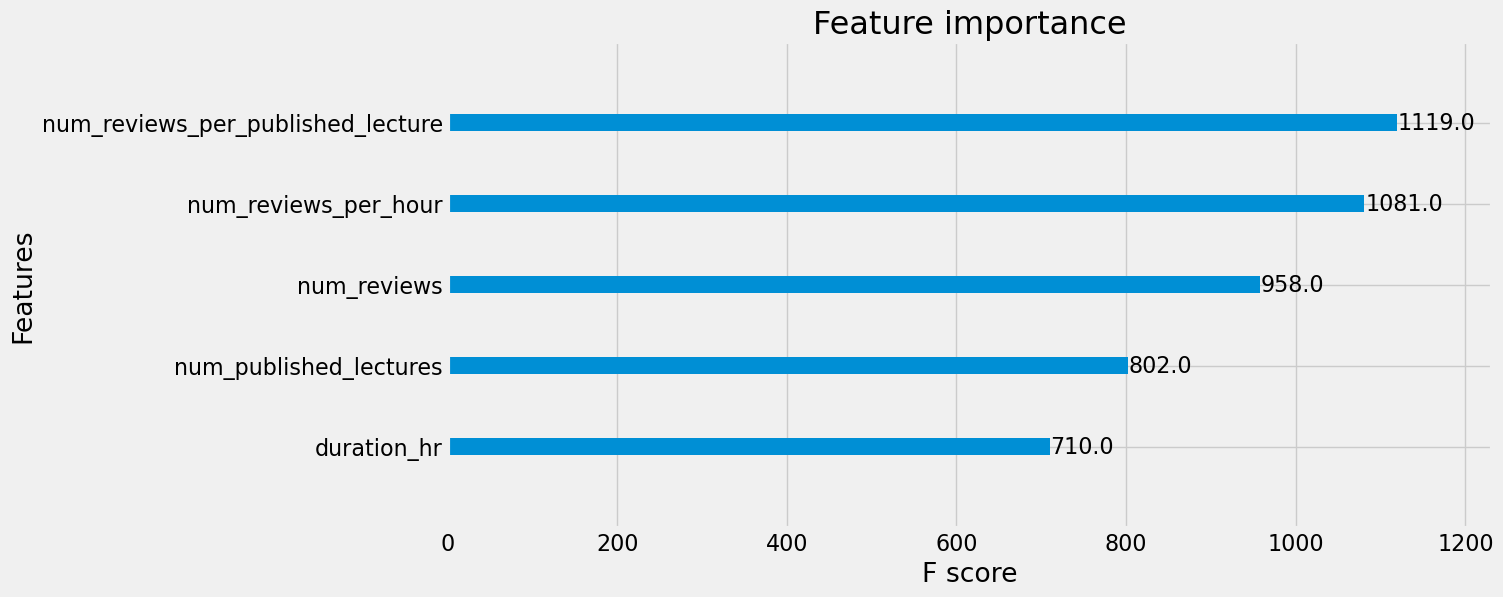

In [1115]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=8, ax=ax)
plt.show();

As the importance plot suggests, the features that were engineered had the most importance.